In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/Thesis/Simulations/05_Photonic_crystal_slabs/Hole_square_lattice/angle_sweep


In [3]:
for i in range(11):
    globals()["f" + str(i)] = np.genfromtxt(path+"/hole_square_lattice_slope_bands_POL_"+str(i)+"_deg_bands.dat", delimiter=",")[:,1:]

In [4]:
X_index = int(0.33*len(f0[:,1])) 

freq_0 = f0 [X_index, -1]

In [5]:
frequency_shifts = np.zeros(11)
for i in range(11):
     frequency_shifts [i] =  np.abs( globals()["f" + str(i)] [X_index, -1] - freq_0 )

In [6]:
coef = np.polyfit(np.linspace(0, 10, 11), frequency_shifts, 1)
poly1d_fn = np.poly1d(coef) 

In [7]:
print(coef)

[0.00109578 0.00033645]


Text(0.5, 0, '$\\alpha$ ($^\\circ$)')

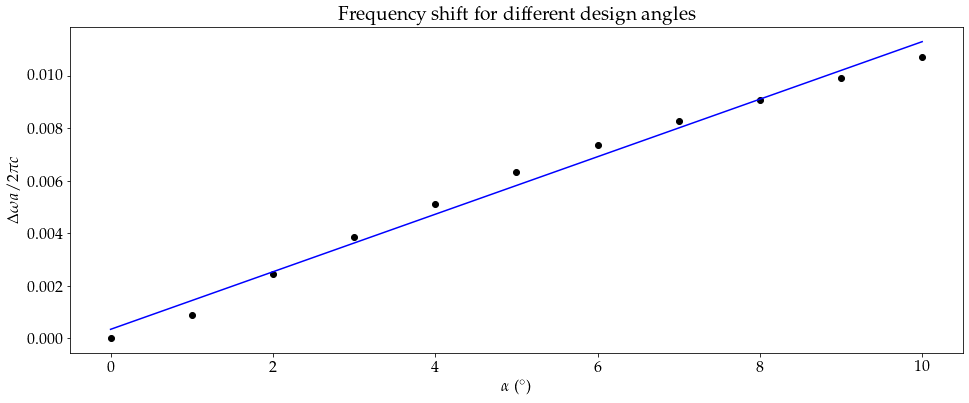

In [8]:
fig, ax = plt.subplots(figsize=(16,6))

x = np.linspace(0, 10, 11)

ax.set_title('Frequency shift for different design angles')
ax.scatter( x, frequency_shifts, color='black', label = 'Data' )
ax.plot( x, poly1d_fn(x), color='blue', label = 'Fit: $\\Delta  \\omega a / 2 \pi c$ = '+str(np.around(coef[0],4))+'$\\alpha$ +  '+str(np.around(coef[1],4)))
ax.set_ylabel('$\\Delta  \\omega a / 2 \pi c$ ')
ax.set_xlabel('$\\alpha$ ($^\\circ$)')

Will try to fit with another function: $f(x)= A \sin( B x ) + C x + D$

In [9]:
def f(x, A, B, C, D):
    return A* np.sin(B*x) + C*  x  + D

In [10]:
from  scipy.optimize import curve_fit

opt_params, _ = curve_fit(f, x, frequency_shifts)

In [11]:
opt_params

array([-4.22530758e-04,  8.39804009e-01,  1.09856626e-03,  4.04251071e-04])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


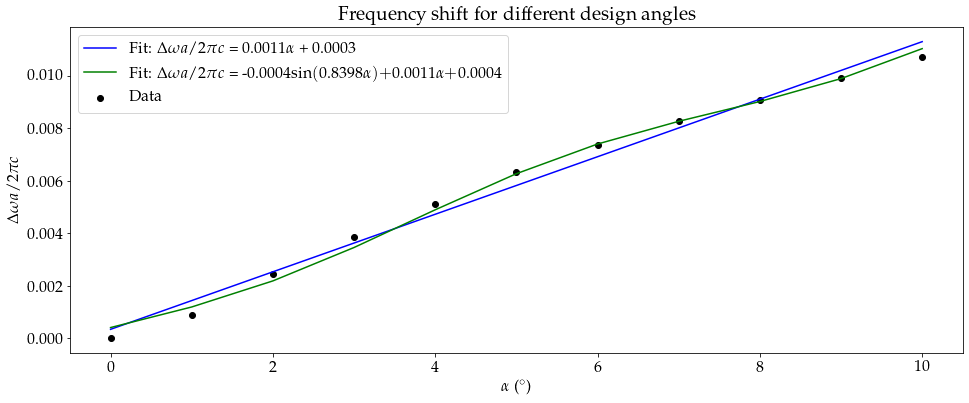

In [12]:
ax.plot( x, f(x, opt_params[0], opt_params[1], opt_params[2], opt_params[3]), color='green', label = 'Fit: $\\Delta  \\omega a / 2 \pi c$ = '+str(np.around(opt_params[0],4))+'$ \sin($'+str(np.around(opt_params[1],4))+'$\\alpha)+$'+str(np.around(opt_params[2],4))+'$\\alpha+$'+str(np.around(opt_params[3],4)))
ax.legend()
fig

In [13]:
fig.savefig('data_and_fits.pdf')